# Assignment Netwerkanalyse

## Notebook made by

**Gebruik graag dit formaat**

* Voor de namen:  voornaam rest van je naam, voornaam rest van je naam,....
* je studentnummers: hetzelfde: scheidt met `,`
* je emails: hetzelfde: scheidt met `,`
* voor je groep: alleen de hoofdletter (dus voor de groep van Marx zou je `A` kiezen)

__Namen__: Padma Dhuney, Mouad, 

__Emails__: 

__Student ids__ : 14531003,

__Groep__ : VervangMijDoorEenHoofdletter

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Week 1

# Deel 1: Programmeren

Voor deze opdrachten maken we gebruik van Networkx, de documentatie daarvan is te vinden via [deze link](https://networkx.github.io/documentation/stable/). Kijk vooral naar welke functies zij bieden, zodat je niet dingen doet die zij al voor je doen (tenzij dat natuurlijk de opdracht is).

Staat er `ModuleNotFoundError: No module named X`, doe dan in een cell `!pip install X` (natuurlijk is X hier iets van `matplotlib`, `networkx`, `scipy` of `nose`) en run de cell dan opnieuw.

Mocht dat niet werken, probeer dan `!pip3 install X` (werkt alleen bij Mac) of restart de kernel en probeer opnieuw! Mocht dat allemaal ook niet werken, roep dan even een TA!

In [14]:
# Installeer benodigde packages
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
from nose.tools import assert_equal
from numpy.testing import assert_almost_equal, assert_array_almost_equal

## Vraag 1
<p>Maak een networkx ongerichte graaf `G` met de volgende knopen en lijnen:</p>
<center>
    V = {1, 2, 3, 4, 5} en 
    E = { (1, 2) , (1, 4) , (2, 3) , (2, 4) , (2, 5) , (3, 4) , (3, 5) }
</center>


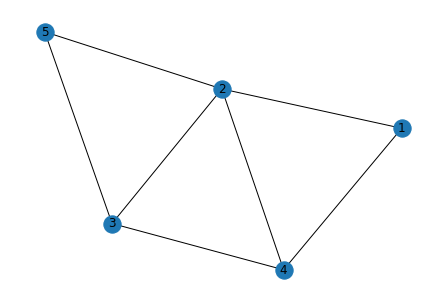

In [17]:
G = None

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1, 2) , (1, 4) , (2, 3) , (2, 4) , (2, 5) , (3, 4) , (3, 5)])



nx.draw(G, with_labels=True)

In [18]:
assert_equal(nx.is_directed(G), False)

## Vraag 2
Maak op basis van het netwerk `G` een dictionary genaamd `neighborDict` met als key een node en als value de verzameling  met alle buren van die knoop.
Gebruik dict comprehensie.

Bijvoorbeeld: `neighborDict[5] = {2, 3}`

In [25]:
neighborDict = None

neighborDict= {i: set(G.neighbors(i)) for i in G.nodes}

#for i in G.nodes: 
    #neighborDict[i]= set(G.neighbors(i))
                      

neighborDict

{1: {2, 4}, 2: {1, 3, 4, 5}, 3: {2, 4, 5}, 4: {1, 2, 3}, 5: {2, 3}}

In [7]:
assert_equal(type(neighborDict), dict)


## Vraag 3
Maak een functie `make_complete(G)` die teruggeeft hoeveel lijnen toegevoegd moeten worden aan een willekeurig  ongericht netwerk `G` (die misschien al lijnen bevat) om er een volledige graaf van te maken. Zorg dat het resultaat een integer is.


5


4799

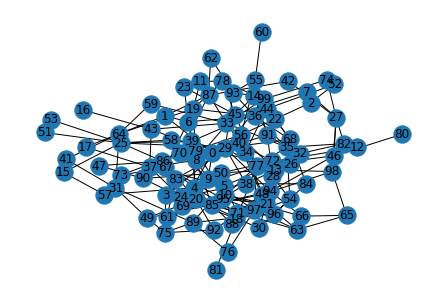

In [74]:
def make_complete(G):
    n= G.number_of_nodes()
    complete_graaf= ((n*n-1)/2)
    m = G.number_of_edges()
    return int(complete_graaf - m)

# test 1
print(make_complete(G))
# test 2
ER = nx.gnm_random_graph(100, 200) # Zie https://networkx.github.io/documentation/stable/auto_examples/graph/plot_erdos_renyi.html
nx.draw(ER, with_labels=True);
make_complete(ER)

In [30]:
assert_equal(type(make_complete(G)), int)

## Vraag 4
Maak een functie `my_degree(G)` die een dictionary maakt met als sleutels alle knopen van `G`    en als value de degree van de sleutel in `G`. Het resultaat is hetzelfde als `dict(G.degree())`.

* Gebruik een dict comprehensie!
* Je mag alleen de networkx functie `G.has_edge()` gebruiken. 

Zie: https://en.wikipedia.org/wiki/Degree_(graph_theory)

Voorbeeld resultaat op ons eigen netwerk `G`: `{1: 2, 2: 4...}`

G: {1: 2, 2: 4, 3: 3, 4: 3, 5: 2}


{0: 4, 1: 4, 2: 6, 3: 4, 4: 4, 5: 3, 6: 7, 7: 3, 8: 3, 9: 2}

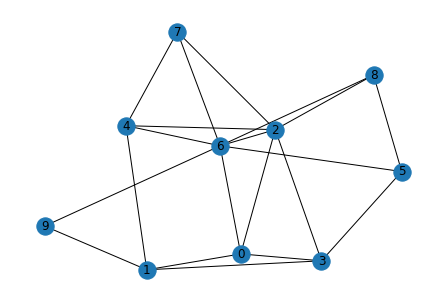

In [56]:
def my_degree(G):
    '''
    emptydict= {}
    for u in G.nodes: 
        count= 0
        for v in G.nodes:
            if G.has_edge(u,v) is True:
                count= count +1
        emptydict[u]= count
    return emptydict
    '''

    my_degrees = {u:  sum(1 for v in G.nodes() if G.has_edge(u, v)) for u in G.nodes()}
    return my_degrees


# test 1
print('G:', my_degree(G))

# test 2
ER = nx.gnm_random_graph(10, 20) # Zie https://networkx.github.io/documentation/stable/auto_examples/graph/plot_erdos_renyi.html
nx.draw(ER, with_labels=True);
my_degree(ER)

In [57]:
assert_equal(my_degree(G), dict(G.degree()))

## Vraag 5
Teken de subgraven van `G` geinduceerd door {1,2,3} en {2,5,3} en {5,4} en geef deze graven de namen respectievelijk `I`, `J` en `K`

{(2, 3), (1, 2)}


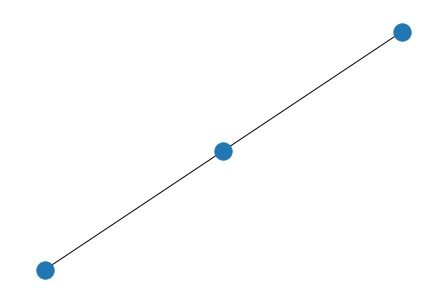

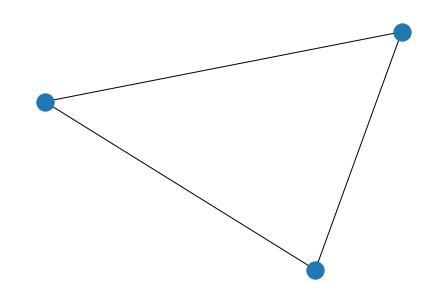

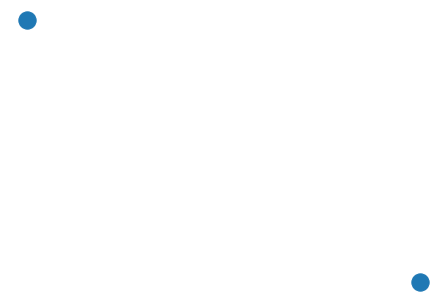

In [75]:
I = None
J = None
K = None

def subgraph(G,N):
    '''return the subgraph of G induced by the set of nodes N'''
    return  {(s,t) for (s,t) in G if s in N  and  t in N}

I = nx.Graph()
J = nx.Graph()
K = nx.Graph()

print(subgraph(G.edges(),{1,2,3}))
I.add_nodes_from([1,2,3])
J.add_nodes_from([2,5,3])
K.add_nodes_from([5,4])
I.add_edges_from((subgraph(G.edges(),{1,2,3})))
J.add_edges_from((subgraph(G.edges(),{2,5,3})))
K.add_edges_from((subgraph(G.edges(),{5,4})))
plt.figure(1)
nx.draw(I)
plt.figure(2)
nx.draw(J)
plt.figure(3)
nx.draw(K)
plt.show()

In [59]:
assert_equal(sorted(list(I.nodes())), [1, 2, 3])
assert_equal(sorted(list(J.nodes())), [2, 3, 5])
assert_equal(sorted(list(K.nodes())), [4, 5])

## Vraag 6
Maak de functie `adj_matrix(G)`  en `adj_matrix2(G)` die allebei een adjacency matrix maken. In het geval van de graaf `G` die je hebt gemaakt bij vraag 1, heeft de matrix van deze  vorm (alleen dan in de vorm van een lijst van lijsten):
    <pre>
        1 2 3 4 5
      1 0 1 0 1 0
      2
      3
      4
      5
    </pre>
    
Een aantal eisen:
* Zorg dat de functies werken voor elk netwerk, niet alleen `G`. (We kijken de functies ook na met andere netwerken dan `G`.
* Gebruik enkel list comprehensies.
* Je mag in beide functies niet de networkx functie `nx.adjacency_matrix` gebruiken.
* Bij `adj_matrix(G)` moet je de networkx functie `G.has_edge` gebruiken en  geen enkele andere networkx functie.
* Bij `adj_matrix2(G)` moet je de networkx functie `G.neighbors` (dit is niet hetzelfde als `nx.neighbors`!) gebruiken en  geen enkele andere networkx functie.
* Zorg dat de nodes altijd gesorteerd zijn, zodat de matrix op volgorde is
* Hint:`int(True)==1` en `int(False)==0`, en dus ook `int(5==4)==0`.
    
Je antwoord voor netwerk `G` zal er zo uit zien:

```
[[0, 1, 0, 1, 0],
       ....
       ] 
```

In [97]:
def adj_matrix(G):
    #WRITE YOUR CODE HERE
    return [[int(G.has_edge(vertex, edges)) for edges in G.nodes] for vertex in G.nodes]

def adj_matrix2(G):
    #WRITE YOUR CODE HERE
    return [[int(edges in G.neighbors(vertex)) for edges in G.nodes] for vertex in G.nodes]
        
adj_matrix(G), adj_matrix2(G), adj_matrix(G)==adj_matrix2(G)

# test het zelf ook met de ER graaf.

([[0, 1, 0, 1, 0],
  [1, 0, 1, 1, 1],
  [0, 1, 0, 1, 1],
  [1, 1, 1, 0, 0],
  [0, 1, 1, 0, 0]],
 [[0, 1, 0, 1, 0],
  [1, 0, 1, 1, 1],
  [0, 1, 0, 1, 1],
  [1, 1, 1, 0, 0],
  [0, 1, 1, 0, 0]],
 True)

In [ ]:
assert_equal(type(adj_matrix(G)), list)
assert_equal(type(adj_matrix(G)[0]), list)
assert_equal(type(adj_matrix(G)[0][0]), int)
assert_equal(type(adj_matrix2(G)), list)
assert_equal(type(adj_matrix2(G)[0]), list)
assert_equal(type(adj_matrix2(G)[0][0]), int)
assert_equal(type(adj_matrix2(G)[0][0]), int)
assert_array_almost_equal(adj_matrix(G), adj_matrix2(G))


# Opgaven uit First Course

1. Alles uit Hfd 0
2. Hfd 1: alles tot en met 21.
3. Maak opgave 21 in `networkx`
        * maak het netwerk, met `G.add_edges`
        * print het
        * maak ook de adjecency matrix als een lijst van lijsten
        * check dat deze adjencency matrix hetzelfde is als een adjececy matrix die networkx maakt.
4. Schrijf nu ook checks voor alle vragen 1.17-1.20 in Python en controleer je antwoord.

YOUR ANSWER HERE

# FC vraag 1.13

* Maak deze vraag ook in networkx.
    * Maak een functie `Q113(N1,N2)` die een network teruggeeft zoals gevraagd
    * Met welke check check je dat het "volledig" (voor een bipartiet netwerk natuurlijk) is?
    
* **Hint** Google eens wat.

In [ ]:
def Q113(N1,N2):
    '''Return a maximal bipartite network with N1 nodes on one side and N2 on the other.'''
    #WRITE YOUR CODE HERE
    
def maximaal_bipartiet(BG):
    '''Return True if BG is a maximal bipartite network. False in all other cases.'''
    #WRITE YOUR CODE HERE
    
#test
maximaal_bipartiet(Q113(5,10))

In [ ]:
assert isinstance(Q113(5,10),nx.Graph)
assert isinstance(maximaal_bipartiet(Q113(5,10)), bool)


    
 

In [ ]:
#WRITE YOUR CODE HERE

In [ ]:
#WRITE YOUR CODE HERE

# Verzamelingen

* Dubbel klik eens op deze cel zodat je de code ziet.
* Leer dan de latex codes voor de mooie symbolen, en zorg dat je zelf nu ook netjes antwoord kunt geven.
* Formules zet je altijd tussen dollartekens.
    * Als je het in het midden van de regel wil tussen dubbele dolalartekens
* Elk commando begint altijd met `\`. Spaties maken niks uit. Latex regelt hoe het er netjes uit komt te zien.

### Opgaven

1. $\{1,2,3\}\cap\{2,3,4\}=\{2,3\}$
1. $\{1,2,3\}\cup\{2,3,4\}=\{1,2,3,4\}$
1. $\{1,2,3\}\setminus\{2,3,4\}=\{1,4\}$
1. $\emptyset\setminus\{2,3,4\}=\emptyset$
2. $\{1,2,3\}\times\{2,3,4\}=\{(1,2),(1,3),(1,4),(2,2),(2,3),(2,4),(3,2),(3,3),(3,4)\}$
3. De machtsverzameling van $\{1,2,3,4\}= \mathcal{P}(\{1,2,3,4\}) = \{\emptyset, \{1\}, \{2\}, \{3\}, \{4\}, \{1,2\}, \{1,3\}, \{1,4\}, \{2,3\}, \{2,4\}, \{3,4\}, \{1,2,3\}, \{1,2,4\}, \{1,3,4\}, \{2,3,4\}, \{1,2,3,4\}\}$ 
     * Check dat je echt $2^4$ veel deelverzamelingen hebt gevonden.
     * het heet niet voor niks *machts* verzameling ;-)

#### Teken ook netjes de Venn diagrammen
#### Check je antwoorden ook in Python
#### Maak zelf opgaven en leg die aan je groepsleden voor

# Comprehensies

* Zorg dat je list, set en dict comprehensies echt goed in je vingers krijgt!
* Het is heerlijk als je het kunt.

### Goede uitleg

Ik [Googlede op python comprehension tutorial](https://www.google.com/search?q=python+comprehension+tutorial) en de [video](https://www.youtube.com/watch?v=3dt4OGnU5sM) is prima, maar ook de [datacamp tutorial](https://www.datacamp.com/community/tutorials/python-list-comprehension) of de [real python](https://realpython.com/list-comprehension-python/) tutorial.

### Wat opgaven

Je gaat allemaal comprehensies doen op een gedicht van annie MG Schmidt. Het staat in de cel hieronder als string in de variabele `AMGS` en daarna als lijst van woorden in `t`.

In je tests gebruik je allemaal string functies, en ook `in`. 

#### list comprehensies

1. de lijst van alle woorden in `AMGS` beginnend met een `i`. (antwoord beneden)
2. zelfde maar dan beginnend met `i` of `I`. (antwoord beneden)
3. de lijst van alle woorden in `AMGS` van lengte meer dan 3
4. de lijst van alle woorden in `AMGS` waar een `a` in zit
5. nu waar juist geen `a` in zit
6. nu waar als er een `a` in zit ook een `b` in zit (wat betekent dit precies he?)
7. alle woorden zonder klinker.
8. Voor elk woord zijn lengte.
9. De lijst met het hele gedicht maar nu waar elk woord met een hoofdletter begint.
10. De lijst die net zo lang is als het gedicht (dus `t`), maar dan op elke positie of het woord op die positie gelijk is aan `ik`. Dus de waardes zijn alleen maar `True` en `False`.
    * Gebruik `sum` om te berekenen hoe vaak het woord `ik` voorkomt.
11. Verzien er zelf 10 bij, en maak die ook, en geef ze aan je groepsgenoeten.

#### set comprehensies

1. De verzameling van alle unieke woorden in `AMGS`.
2. De verzameling van alle unieke woorden in `AMGS` met `ch` er in.
3. De verzameling van alle unieke woorden in `AMGS`, maar dan geschreven in hoofdletters.
4. Alle woordlengtes die in `AMGS` voorkomen.


### Dict comprehensies

1. De dict met voor elk uniek "woord" in `AMGS` zijn lengte. Dus het woord is de key en de lengte de waarde. Let op , woorden zijn dus de elementen in `t`. (antwoord beneden)
2. De dict met voor elk uniek "woord" in `AMGS` de verzameling karakters in dat woord.
3. De dict met voor elk uniek "woord" in `AMGS`  de "schoongemaakte" versie van dat woord (zonder leestekens, etc, gebruik een lange lijst als `a.replace(':','').replace(',','')`. Zet het woord ook in klein eletters.

    
### Nesting

3. De dict met voor elk uniek woord, de verzameling klinkers in dat  woord. 
    *   (antwoord beneden, probeer eerst minstens een half uur zelf)
4.  De dict met voor elke positie in `AMGS`, de verzameling met het woord voor die positie  en het woord erna.
    (antwoord ook beneden, niet meteen gan kijken.)
5. DE dict met voor elk woord de verzameling posities waar het voorkomt. Tricky maar leuk!   Hint loop over de posities. 
6. Na de vorige is deze heel makkelijk: DE dict met voor elk woord  hoe vaak het voorkomt. 


In [78]:
AMGS='''
Ik wil niet meer, ik wil niet meer!
Ik wil geen handjes geven!
Ik wil niet zeggen elke keer:
Jawel mevrouw, jawel meneer...
nee, nooit meer in m'n leven!
Ik hou m'n handen op m'n rug
en ik zeg lekker niks terug!

Ik wil geen vieze havermout,
ik wil geen tandjes poetsen!
Ik wil lekker knoeien met het zout,
ik wil niet aardig zijn, maar stout
en van de leuning roetsen
en schipbreuk spelen in de teil
en ik wil spugen op het zeil!

En heel hard stampen in een plas
en dan m'n tong uitsteken
en morsen op m'n nieuwe jas
en ik wil overmorgen pas
weer met twee woorden spreken!
En ik wil alles wat niet mag,
de hele dag, de hele dag!

En ik wil op de kanapee
met hele vuile schoenen
en ik wil aldoor gillen: nee!
En ik wil met de melkboer mee
en dan het paardje zoenen.
En dat is alles wat ik wil
en als ze kwaad zijn, zeg ik: Bil!'''

t=AMGS.split()
len(t),t[:10]

(168,
 ['Ik', 'wil', 'niet', 'meer,', 'ik', 'wil', 'niet', 'meer!', 'Ik', 'wil'])

In [79]:
# probeer eens alleen t[0]. en dan shift return, en probeer eens wat van de suggesties
# om erachter te komen wat iets doet typ je t[0].isupper? en dan shift enter.
# Ideaal he! Dat kan bij elk object. t[0] is natuurlijk een string, dus je krijgt string functies te zien. 
t[0].isupper()

False

In [80]:
# "in" is ook heel handig in Python

print(t[1])
'i' in t[1], 'W' in t[1], 'W' in t[1].upper()

wil


(True, False, True)

In [81]:
#de lijst van alle woorden in `AMGS` beginnend met een `i`. (antwoord beneden)
[w for w in t if w.startswith('i')]

['ik',
 'in',
 'ik',
 'ik',
 'ik',
 'in',
 'ik',
 'in',
 'ik',
 'ik',
 'ik',
 'ik',
 'ik',
 'is',
 'ik',
 'ik:']

In [88]:
#2. zelfde maar dan beginnend met `i` of `I`. (antwoord beneden)
# Verzin minstens 2 andere manieren om exact hetzelfde te krijgen
[w for w in t if w.startswith('i') or w.startswith('I')]
[w for w in t if w.startswith('i')] or [w for w in t if w.startswith("I")]
[w for w in t if w[0].lower() == 'i' or w[0].upper() == "I"]
[w for w in t if w[0] in 'iI']
[w for w in t if w[0] == 'i' or w[0] == "I"]

['Ik',
 'ik',
 'Ik',
 'Ik',
 'in',
 'Ik',
 'ik',
 'Ik',
 'ik',
 'Ik',
 'ik',
 'in',
 'ik',
 'in',
 'ik',
 'ik',
 'ik',
 'ik',
 'ik',
 'is',
 'ik',
 'ik:']

In [48]:
#  De dict met voor elk uniek woord in `AMGS` zijn lengte.
set(t)#De verzameling van alle unieke woorden in `AMGS`.
{w:len(w) for w in t}

{'Ik': 2,
 'wil': 3,
 'niet': 4,
 'meer,': 5,
 'ik': 2,
 'meer!': 5,
 'geen': 4,
 'handjes': 7,
 'geven!': 6,
 'zeggen': 6,
 'elke': 4,
 'keer:': 5,
 'Jawel': 5,
 'mevrouw,': 8,
 'jawel': 5,
 'meneer...': 9,
 'nee,': 4,
 'nooit': 5,
 'meer': 4,
 'in': 2,
 "m'n": 3,
 'leven!': 6,
 'hou': 3,
 'handen': 6,
 'op': 2,
 'rug': 3,
 'en': 2,
 'zeg': 3,
 'lekker': 6,
 'niks': 4,
 'terug!': 6,
 'vieze': 5,
 'havermout,': 10,
 'tandjes': 7,
 'poetsen!': 8,
 'knoeien': 7,
 'met': 3,
 'het': 3,
 'zout,': 5,
 'aardig': 6,
 'zijn,': 5,
 'maar': 4,
 'stout': 5,
 'van': 3,
 'de': 2,
 'leuning': 7,
 'roetsen': 7,
 'schipbreuk': 10,
 'spelen': 6,
 'teil': 4,
 'spugen': 6,
 'zeil!': 5,
 'En': 2,
 'heel': 4,
 'hard': 4,
 'stampen': 7,
 'een': 3,
 'plas': 4,
 'dan': 3,
 'tong': 4,
 'uitsteken': 9,
 'morsen': 6,
 'nieuwe': 6,
 'jas': 3,
 'overmorgen': 10,
 'pas': 3,
 'weer': 4,
 'twee': 4,
 'woorden': 7,
 'spreken!': 8,
 'alles': 5,
 'wat': 3,
 'mag,': 4,
 'hele': 4,
 'dag,': 4,
 'dag!': 4,
 'kanapee': 7,
 '

In [94]:
# De dict met voor elk uniek woord, de verzameling klinkers in dat  woord.

{w:{l for l in w if l in 'aeiou' or l in 'AEIOU' } 
    for w in set(t)} # verbeter hem zelf zodat hoofdletters ook mee worden genomen


{'nee,': {'e'},
 'ze': {'e'},
 'vieze': {'e', 'i'},
 'pas': {'a'},
 "m'n": set(),
 'nooit': {'i', 'o'},
 'hele': {'e'},
 'met': {'e'},
 'melkboer': {'e', 'o'},
 'dat': {'a'},
 'elke': {'e'},
 'leven!': {'e'},
 'stampen': {'a', 'e'},
 'hou': {'o', 'u'},
 'paardje': {'a', 'e'},
 'tong': {'o'},
 'jas': {'a'},
 'ik': {'i'},
 'meneer...': {'e'},
 'kanapee': {'a', 'e'},
 'handjes': {'a', 'e'},
 'tandjes': {'a', 'e'},
 'teil': {'e', 'i'},
 'handen': {'a', 'e'},
 'zijn,': {'i'},
 'poetsen!': {'e', 'o'},
 'nee!': {'e'},
 'lekker': {'e'},
 'de': {'e'},
 'hard': {'a'},
 'nieuwe': {'e', 'i', 'u'},
 'uitsteken': {'e', 'i', 'u'},
 'meer,': {'e'},
 'op': {'o'},
 'meer': {'e'},
 'dan': {'a'},
 'aldoor': {'a', 'o'},
 'aardig': {'a', 'i'},
 'zeg': {'e'},
 'havermout,': {'a', 'e', 'o', 'u'},
 'niet': {'e', 'i'},
 'meer!': {'e'},
 'mee': {'e'},
 'alles': {'a', 'e'},
 'wil': {'i'},
 'morsen': {'e', 'o'},
 'schipbreuk': {'e', 'i', 'u'},
 'Bil!': {'i'},
 'heel': {'e'},
 'geen': {'e'},
 'niks': {'i'},
 'rug':

In [95]:
#  De dict met voor elke positie in `AMGS`, de verzameling met het woord voor die positie  en het woord erna.

{i:{t[i-1],t[i+1]} for i in range(1,len(t)-1)}

{1: {'Ik', 'niet'},
 2: {'meer,', 'wil'},
 3: {'ik', 'niet'},
 4: {'meer,', 'wil'},
 5: {'ik', 'niet'},
 6: {'meer!', 'wil'},
 7: {'Ik', 'niet'},
 8: {'meer!', 'wil'},
 9: {'Ik', 'geen'},
 10: {'handjes', 'wil'},
 11: {'geen', 'geven!'},
 12: {'Ik', 'handjes'},
 13: {'geven!', 'wil'},
 14: {'Ik', 'niet'},
 15: {'wil', 'zeggen'},
 16: {'elke', 'niet'},
 17: {'keer:', 'zeggen'},
 18: {'Jawel', 'elke'},
 19: {'keer:', 'mevrouw,'},
 20: {'Jawel', 'jawel'},
 21: {'meneer...', 'mevrouw,'},
 22: {'jawel', 'nee,'},
 23: {'meneer...', 'nooit'},
 24: {'meer', 'nee,'},
 25: {'in', 'nooit'},
 26: {"m'n", 'meer'},
 27: {'in', 'leven!'},
 28: {'Ik', "m'n"},
 29: {'hou', 'leven!'},
 30: {'Ik', "m'n"},
 31: {'handen', 'hou'},
 32: {"m'n", 'op'},
 33: {'handen', "m'n"},
 34: {'op', 'rug'},
 35: {'en', "m'n"},
 36: {'ik', 'rug'},
 37: {'en', 'zeg'},
 38: {'ik', 'lekker'},
 39: {'niks', 'zeg'},
 40: {'lekker', 'terug!'},
 41: {'Ik', 'niks'},
 42: {'terug!', 'wil'},
 43: {'Ik', 'geen'},
 44: {'vieze', 'wi

In [96]:
#  DE dict met voor elk woord de verzameling posities waar het voorkomt. Tricky maar leuk!    
l=dict()
